In this notebook we will:
- select a jet in the Solar Jet Hunter catalogue
- plot a frame of the jet and plot the average box around the jet
- plot all the boxes found from different subjects in Zooniverse for this jet
- plot one of the subject box on the jet

You will need to have the data already downloaded for this jet, see the notebook 'SolarJetHunter_download_solar_data'

# Open catalogue and select a jet

### Open catalogue
See tutorial for more details

In [1]:
import numpy as np
from utils.Jet_class_light import json_import_list

In [2]:
json_file = 'exports/Jet_clusters_3.0_2.0.paperID.json'
Jet_catalogue=json_import_list(json_file)

The 883 JetCluster objects are imported from exports/Jet_clusters_3.0_2.0.paperID.json.


### Select a jet

In [3]:
jetid = 509
selected_jet = Jet_catalogue[jetid]

Print some jet properties as a check

In [4]:
jet_start_time = selected_jet.obs_time
jet_end_time = selected_jet.obs_time + np.timedelta64(int(selected_jet.Duration*60), 's')
jet_sjh_identifier = selected_jet.ID
print(jet_start_time)
print(jet_end_time)
print(jet_sjh_identifier)

2015-09-22T21:56:06.000000
2015-09-22T22:27:42.000000
sjh_2015-09-22T21_1


Path to the downloaded data for this jet:

In [5]:
data_path = 'data//sjh_cutouts//'+selected_jet.ID
print(data_path)

data//sjh_cutouts//sjh_2015-09-22T21_1


# Plot one frame of the jet and overlay average box

### Make box object for this jet

In [6]:
from utils.Jet_box_class import make_cluster_box, make_subject_box, plot_all_subject_boxes_and_average_box

In [7]:
jet_box = make_cluster_box(selected_jet)

### Find the data for this jet

In [8]:
import glob

In [9]:
files = glob.glob(data_path+"//aia.lev1_euv_12s.*.304.image.fits")
len(files)

80

### Plot jet frame and box

In [12]:
import sunpy.map
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.coordinates  # Needed for helioprojective coordinate frame
import matplotlib.pyplot as plt

Create map with one data file

In [13]:
aia_map = sunpy.map.Map(files[52])

Create jet base and box coordinate objects

In [14]:
jet_base_coord = SkyCoord(jet_box.base[0], jet_box.base[1], 
                                  obstime=aia_map.date, 
                                  observer="earth", 
                                  frame="helioprojective")

In [15]:
rectangle_center_coord = SkyCoord(jet_box.center()[0], jet_box.center()[1], 
                                  obstime=aia_map.date, 
                                  observer="earth", 
                                  frame="helioprojective")

Plot

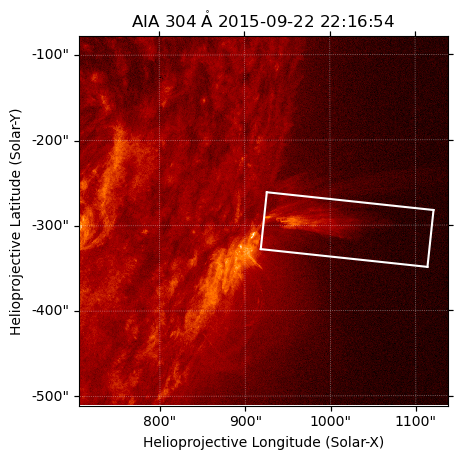

In [16]:
### fig = plt.figure(dpi=150) ### export quality
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
image = aia_map.plot(axes=ax)

# Note that the coordinates need to be in degrees rather than arcseconds.
for line in jet_box.lines_to_plot():
    ax.plot(line[0]*u.arcsec.to(u.deg), line[1]*u.arcsec.to(u.deg),
            color='white',
            transform=ax.get_transform("world"))

plt.show()

# Plot all subject boxes and average box

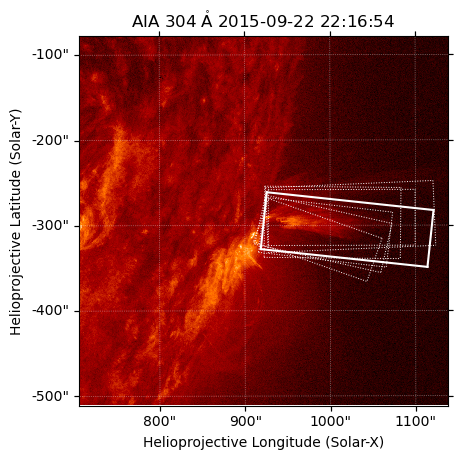

In [17]:
plot_all_subject_boxes_and_average_box(selected_jet, jet_box, aia_map)

# Plot one subject box over the jet

Find which subject (a subject = a sequence of 15 frames) is associated with this frame

In [18]:
subjects_start_time = []
for jet in Jet_catalogue[jetid].jets:
    subjects_start_time.append(jet.time)

In [19]:
subject_idn = np.max(np.where(subjects_start_time < aia_map.date.datetime64))
Jet_catalogue[jetid].jets[subject_idn].time

numpy.datetime64('2015-09-22T22:16:54.000000')

Make the box associated to this subject

In [20]:
subject_box = make_subject_box(Jet_catalogue[jetid].jets[subject_idn])

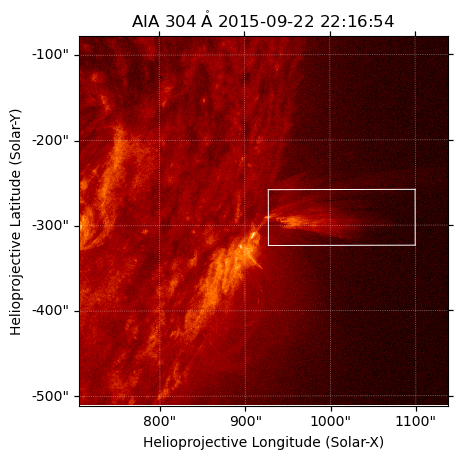

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
image = aia_map.plot(axes=ax)

# Note that the coordinates need to be in degrees rather than arcseconds.
for line in subject_box.lines_to_plot():
    ax.plot(line[0]*u.arcsec.to(u.deg), line[1]*u.arcsec.to(u.deg),
            color='white', linewidth=0.7,
            transform=ax.get_transform("world"))
    
plt.show()